# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
#Weather Py
#Analysis
1) As predicted, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). Therefore
representing an inverse relationship. Temperatures follow an arch that dips to lower temps at higher latitudes
on the positive side. This is likely due to more cities being located on the northern hempisphere
2) Humidty trends toward (100%). Demonstrating humidity extremes exist at all latitudes but
tend to have a higher concentration in northern latitudes
3) Cloudiness is spread out linearly in a squared grid pattern 
4) Wind speeds tend clustering around 5mph. There a small flurry of northern hemispheres 
cities with over 20 mph of wind.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import random
import requests as req
import matplotlib.pyplot as plt
from citipy import citipy
import openweathermapy as owm

#To get the current date
import datetime
now = datetime.datetime.now()
# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

## Generate Cities List

In [3]:
# Create a settings object with your API key and preferred units
api_key = "fafe7c30f38f203b72483f2d2f655f99"
# Setting the units to imperial to get Fahrenheit reading
settings = {"units": "imperial", "appid": api_key}


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:

# Latitude ranges from -90 to 90 and Longitude ranges from -180 to 180
lat = list(np.arange(-90,90.01,0.01))
long = list(np.arange(-180,180.01,0.01))

# Setting Latitude and Longitude to ramdomly pick co-ordinates.
lat_samples=random.sample(lat,2500)
long_samples=random.sample(long,2500)

# Creating a dataframe from the randomly sample Latitude and Longitude
cities_df=pd.DataFrame({"Latitude":lat_samples,"Longitude":long_samples})

#Creating new columns City and Country for storing the details corresponding to the co-ordinates
cities_df["City"]=""
cities_df["Country"]=""

# Finding the city and the country code corresponding to the Latitude and Longitude
for index,row in cities_df.iterrows():
    city=citipy.nearest_city(row["Latitude"], row["Longitude"])
    cities_df.set_value(index, "City", city.city_name)
    cities_df.set_value(index, "Country", city.country_code)

# Dropping the Latitude and Longitude as they are values of the nearest city and not the excat co-ordinates of the city
cities_df=cities_df.drop(cities_df.columns[[0, 1]], axis=1)

# Deleting duplicate values from the list of cities and keeping only the first
cities_df=cities_df.drop_duplicates(['City'], keep='first')

# Randomly sampling a list of 800 cities 
cities_df=cities_df.sample(n=800)

# Resetting the index of the cities list
cities_df=cities_df.reset_index(drop=True)

cities_df.head()

C:\Users\irbyh\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\irbyh\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


,City,Country
0,thompson,ca
1,sinnamary,gf
2,odweyne,so
3,byron bay,au
4,meyungs,pw


In [5]:

# Get data for each city in cities_df
weather_data = []

url="https://api.openweathermap.org/data/2.5/weather?appid=" + api_key + "&units=imperial&q="

print("\nStats Data Minning\n-----------------------------")
#Get the response from OpenWeatherMapY and storing the response into weather_data if response is found
for index,row in cities_df.iterrows():  
    print("\nProcessing record %s|%s,%s"%((index+1),row["City"],row["Country"]))
    print("\n"+url+"%s,%s"%(row["City"].replace(" ","+"),row["Country"]))
    try:
        response = owm.get_current("%s,%s"%(row["City"],row["Country"]), **settings)
        # Appending the response to the weather_Data
        weather_data.append(response)
    except:
        print("\n\033[1;31mCity not found. Skipping...\033[1;30m")

print("\n-----------------------------\nData Minning Completed\n-----------------------------")


Stats Data Minning
-----------------------------

Processing record 1|thompson,ca

https://api.openweathermap.org/data/2.5/weather?appid=fafe7c30f38f203b72483f2d2f655f99&units=imperial&q=thompson,ca

Processing record 2|sinnamary,gf

https://api.openweathermap.org/data/2.5/weather?appid=fafe7c30f38f203b72483f2d2f655f99&units=imperial&q=sinnamary,gf

Processing record 3|odweyne,so

https://api.openweathermap.org/data/2.5/weather?appid=fafe7c30f38f203b72483f2d2f655f99&units=imperial&q=odweyne,so

City not found. Skipping...

Processing record 4|byron bay,au

https://api.openweathermap.org/data/2.5/weather?appid=fafe7c30f38f203b72483f2d2f655f99&units=imperial&q=byron+bay,au

Processing record 5|meyungs,pw

https://api.openweathermap.org/data/2.5/weather?appid=fafe7c30f38f203b72483f2d2f655f99&units=imperial&q=meyungs,pw

City not found. Skipping...

Processing record 6|pathein,mm

https://api.openweathermap.org/data/2.5/weather?appid=fafe7c30f38f203b72483f2d2f655f99&units=imperial&q=pathe

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:

# Create an "extracts" object to get the various parameter required to form the weather data table
summary = ["name","sys.country","dt","coord.lat", "coord.lon","main.temp_max","main.humidity","wind.speed","clouds.all"]

# Create a Pandas DataFrame with the results
data = [response(*summary) for response in weather_data]
column_names = ["City","Country","Date","Latitude", "Longitude","Temperature","Humidity","Wind speed","Cloudliness"]
weather_data = pd.DataFrame(data, columns=column_names)

weather_data.head()

,City,Country,Date,Latitude,Longitude,Temperature,Humidity,Wind speed,Cloudliness
0,Thompson,CA,1555696800,55.74,-97.86,50.00,53,4.70,90
1,Sinnamary,GF,1555699835,5.38,-52.96,82.31,78,15.68,42
2,Byron Bay,AU,1555699524,-28.65,153.62,72.00,88,8.05,17
3,Pathein,MM,1555699836,16.78,94.73,81.95,79,9.64,0
4,Wooster,US,1555699569,40.80,-81.94,53.01,100,17.22,90


In [8]:
# Save the result to a csv file
weather_data.to_csv("Weather_Data.csv")
# Count of the data in the dataframe
weather_data.count()

City           698
Country        698
Date           698
Latitude       698
Longitude      698
Temperature    698
Humidity       698
Wind speed     698
Cloudliness    698
dtype: int64

In [10]:
# Creating a function to set the properties of the graph
def plotprops(xlabelname,ylabelname,xlimits):
    plt.xlabel(xlabelname)
    plt.ylabel(ylabelname)
    plt.xlim(xlimits)
    plt.title("%s vs %s (%s/%s/%s)"%(xlabelname,ylabelname,now.month,now.day,now.year),fontsize=14)
    plt.grid(True)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

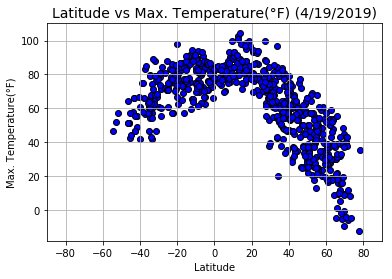

In [12]:
# Latitude vs Temperature(F)
plt.scatter(x=weather_data["Latitude"],y=weather_data["Temperature"],facecolors="blue",edgecolors="black")
plotprops("Latitude","Max. Temperature(°F)",[-90,90])
plt.savefig("City Latitude vs Temperature.jpeg")
plt.show()

#### Latitude vs. Humidity Plot

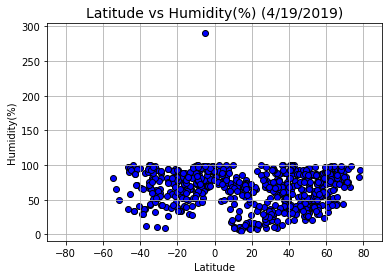

In [13]:

# Latitude vs Humidity

plt.scatter(x=weather_data["Latitude"],y=weather_data["Humidity"],facecolors="blue",edgecolors="black")
plotprops("Latitude","Humidity(%)",[-90,90])
plt.savefig("City Latitude vs Humidity.jpeg")
plt.show()

#### Latitude vs. Cloudiness Plot

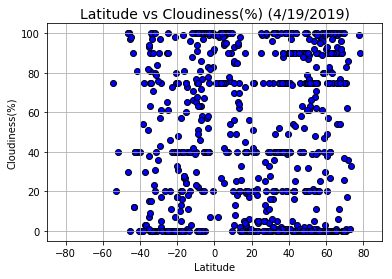

In [14]:
# Latitude vs Cloudliness  

plt.scatter(x=weather_data["Latitude"],y=weather_data["Cloudliness"],facecolors="blue",edgecolors="black")
plotprops("Latitude","Cloudiness(%)",[-90,90])
plt.savefig("City Latitude vs Cloudiness.jpeg")
plt.show()

#### Latitude vs. Wind Speed Plot

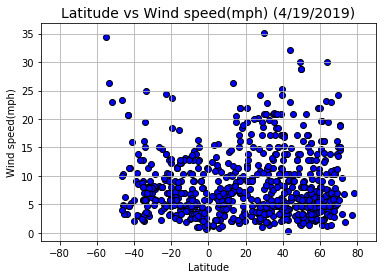

In [15]:
# Latitude vs Wind Speed  

plt.scatter(x=weather_data["Latitude"],y=weather_data["Wind speed"],facecolors="blue",edgecolors="black")
plotprops("Latitude","Wind speed(mph)",[-90,90])
plt.savefig("City Latitude vs Wind speed.jpeg")
plt.show()